# Dataset Description and Features

**Dataset Description:**

The dataset is related to medical symptoms and patient information. It contains various symptoms as features along with patient age, gender, and a unique identifier (PatientID). Each row corresponds to a patient with their symptoms encoded as binary values (0 or 1) indicating the presence or absence of each symptom. Additionally, there is a column labeled "prognosis," which represents the diagnosis or outcome for each patient.

**Dataset source:**

 https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning/code


**Features:**

PatientID: Unique identifier for each patient (numerical)

Age: Age of the patient (numerical)

Gender: Gender of the patient (categorical: 0 for female, 1 for male)

Symptoms:
All symptom columns represent binary data (0 or 1) indicating the absence (0) or presence (1) of each symptom.
Examples of symptoms include itching, skin rash, continuous sneezing, joint pain, stomach pain, and many others.

# Preprocessing with Pandas

 **LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**READ Data from files**

In [2]:
df=pd.read_csv('Training.csv', header=0)

**Identify and handle missing values**

In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,PatientID,Age,Gender,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,65,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,1,72,2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,2,55,2,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,3,53,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,4,68,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


**Dimensionality**

In [5]:
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (4920, 136)


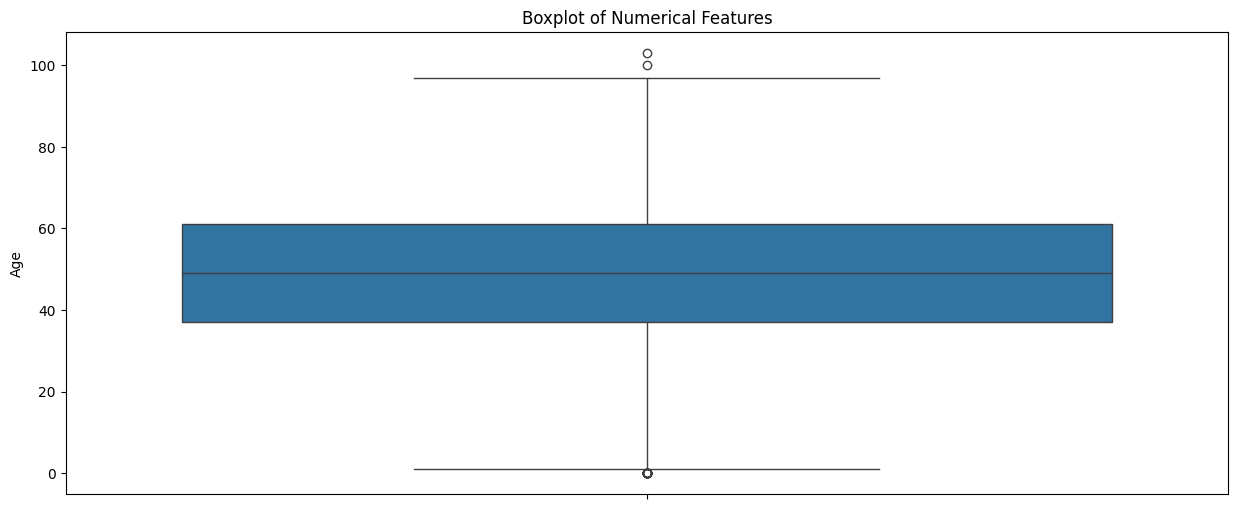

In [6]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df['Age'])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=90)
plt.show()

**Statistics**

In [7]:
# Exclude "Age", "Gender", "PatientID", and "prognosis" columns before computing the sum of symptoms
symptoms = df.drop(["Age", "Gender", "PatientID", "prognosis"], axis=1)
# Calculate the sum of symptoms for each column and sort in descending order
top_symptoms = symptoms.sum().sort_values(ascending=False)
top_symptoms


fatigue                      1932
vomiting                     1914
high_fever                   1362
loss_of_appetite             1152
nausea                       1146
                             ... 
extra_marital_contacts        108
spinning_movements            108
weakness_of_one_body_side     108
foul_smell_of urine           102
fluid_overload                  0
Length: 132, dtype: int64

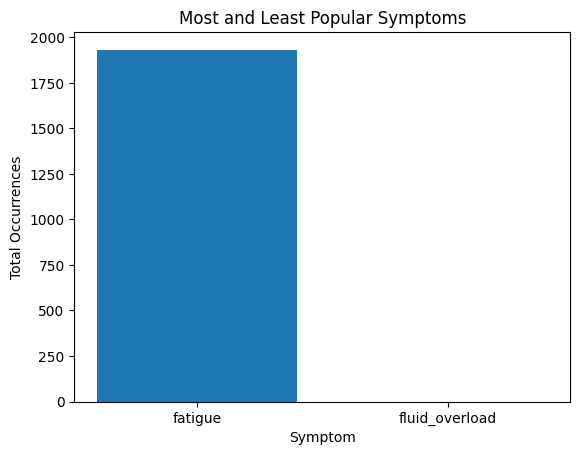

In [8]:
most_and_least_popular_symptoms = symptoms[["fatigue", "fluid_overload"]]
symptom_totals = most_and_least_popular_symptoms.sum()
plt.bar(symptom_totals.index, symptom_totals.values)
plt.xlabel('Symptom')
plt.ylabel('Total Occurrences')
plt.title('Most and Least Popular Symptoms')
plt.show()


In [9]:
symptoms_description = symptoms.describe()
symptoms_variance = symptoms.var()
symptoms_description.loc['variance'] = symptoms_variance
symptoms_description

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
variance,0.118839,0.134261,0.021474,0.043095,0.021474,0.135915,0.119721,0.043095,0.043095,0.021474,...,0.021474,0.021474,0.021474,0.022638,0.022638,0.022638,0.022638,0.022638,0.022638,0.022638


# Data Visualization with Matplotlib

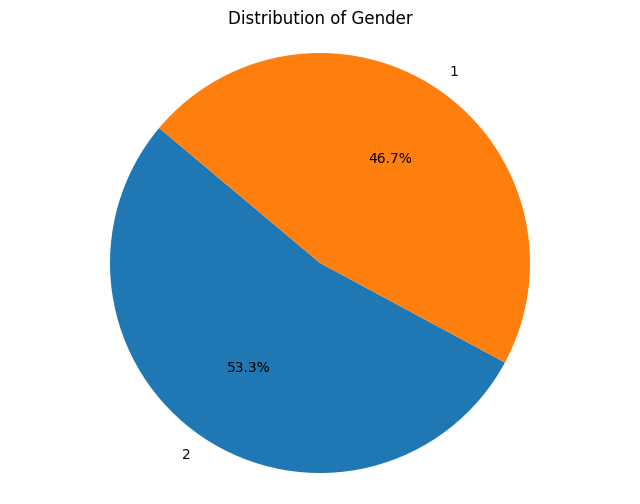

In [10]:
# Create a pie chart for Gender distribution
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [11]:
numerical_features = df.drop(columns=['PatientID', 'Age', 'Gender'])
# Histograms for Numerical Features
numerical_features.hist(figsize=(100, 100))
plt.suptitle("Histograms of Numerical Features", y=0.92)
plt.show()

In [12]:
# Count the occurrences of each value in the 'prognosis' column
pro_counts = df['prognosis'].value_counts()
print("Counts of each value in the 'prognosis' column:")
print(pro_counts)
# Print the total number of unique indexes in the 'prognosis' column
total_indexes = len(pro_counts)
print("Total number of diseases that our model predicts:", total_indexes)

Counts of each value in the 'prognosis' column:
prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
He

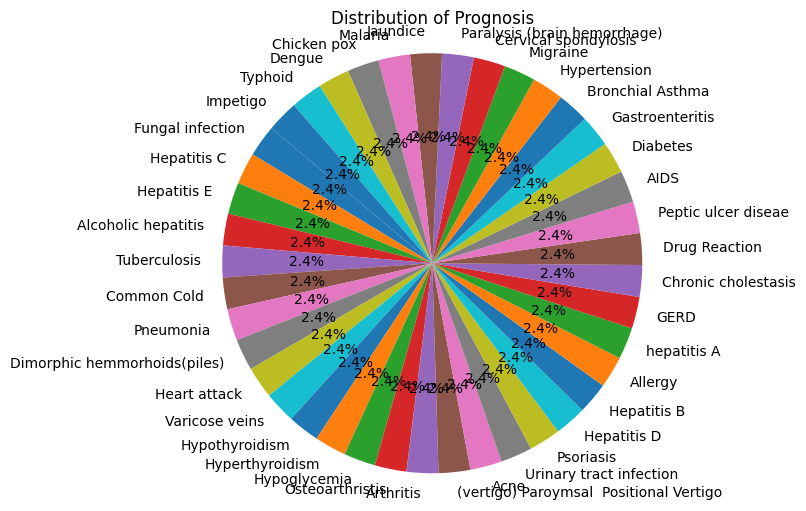

In [13]:
# Create a pie chart for the distribution of prognosis
plt.figure(figsize=(8, 6))
plt.pie(pro_counts, labels=pro_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Prognosis')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

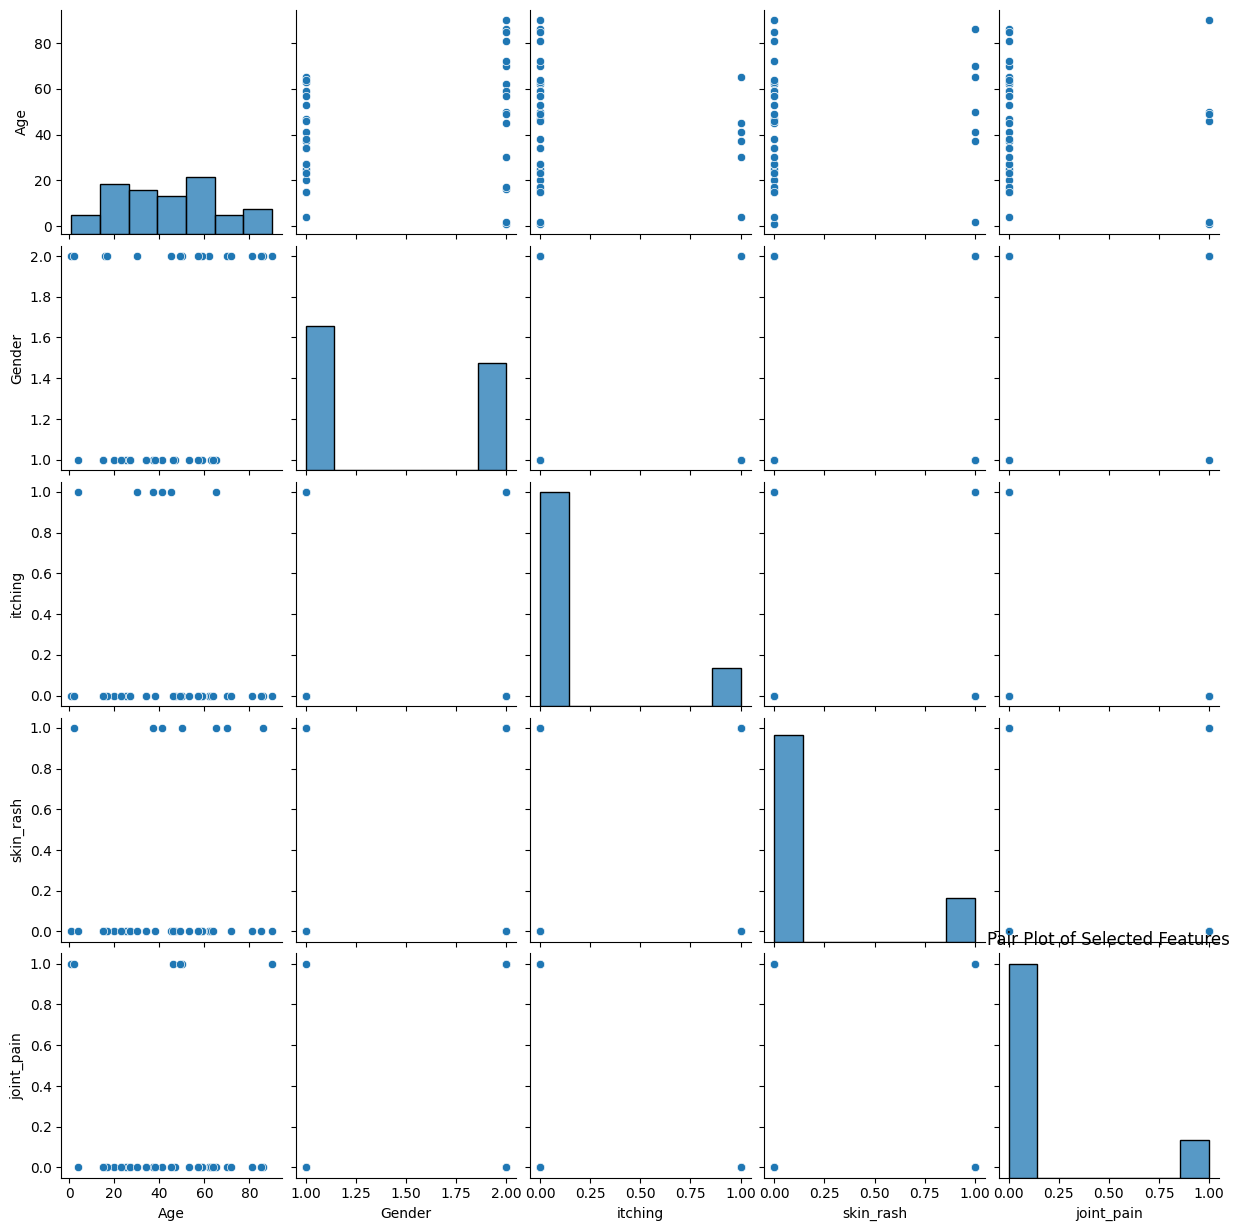

In [14]:
# Drop duplicate rows based on the "prognosis" column
unique_data = df.drop_duplicates(subset=['prognosis'])
# Sample a subset of rows
data_sample = unique_data.sample(n=40, random_state=42)  # Adjust the number of rows to sample as needed
# Select a subset of columns
selected_columns = ['Age', 'Gender', 'itching', 'skin_rash', 'joint_pain','prognosis']  # Add more columns as needed
data_subset = data_sample[selected_columns]
# Create pair plots
sns.pairplot(data_subset)
plt.title("Pair Plot of Selected Features")
plt.show()


# Methodology

Considering the dataset's structure and the nature of the features, a **classification model** seems appropriate. Here's a proposed methodology:

Data Preprocessing:


* Check for missing values:

   Ensure there are no missing values in any columns.

* Encode categorical variables:

  If necessary, encode categorical variables like "Gender" into numerical values.

* Feature scaling:
  
  Normalize or standardize numerical features like "Age" if needed.

* Exploratory Data Analysis (EDA):

  Explore the distribution of each symptom.

  Analyze correlations between symptoms and other variables like age and gender.

  Visualize the data to gain insights into patterns and relationships.

* Feature Selection:

  Use techniques like correlation analysis or feature importance to select relevant symptoms for the model.

* Model Selection:

  Since this is a classification task (predicting the diagnosis), various machine learning models can be considered, such as:
1) Logistic Regression
2) Decision Trees
3) Random Forest
4) Support Vector Machines (SVM)
5) Gradient Boosting Machines (GBM)

* Training:

  Train multiple models and evaluate their performance using appropriate metrics such as accuracy, precision, recall, and F1-score.

  Perform hyperparameter tuning to optimize the selected model's performance.

* Model Evaluation and Validation:

  Validate the trained model using techniques like cross-validation to ensure its generalization ability.

  Evaluate the model's performance on a separate test dataset to assess its effectiveness in predicting diagnoses accurately.

* Interpretation and Deployment:

   Interpret the model's predictions and assess the importance of different symptoms in determining the prognosis.

  If the model performs satisfactorily, deploy it for real-world applications, such as assisting medical professionals in diagnosing diseases based on patient symptoms.

* Conclusion:

   This methodology aims to build a robust classification model that can effectively predict diagnoses based on patient symptoms, contributing to improved medical decision-making and patient care.






# **Model Evaluation**

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import silhouette_score

#Save csv file
df=df.drop(['PatientID','Age','Gender'],axis=1)
print(df)
df=df.to_csv('DataSet.csv')

# Load the dataset
data = pd.read_csv('/content/DataSet.csv')
data = data.drop(['Unnamed: 0'], axis=1)

# Split the dataset into features and target variable
X = data.drop('prognosis', axis=1)
y = data['prognosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a logistic regression model
# lr_model = LogisticRegression(max_iter=1000)
# lr_model.fit(X_train, y_train)

# Train a decision tree classifier model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the testing set
#lr_preds = lr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# # Evaluation metrics for logistic regression model
# lr_accuracy = accuracy_score(y_test, lr_preds)
# lr_precision = precision_score(y_test, lr_preds, average='micro')
# lr_recall = recall_score(y_test, lr_preds, average='micro')
# lr_f1_score = f1_score(y_test, lr_preds, average='micro')

# # Confusion matrix for logistic regression
# lr_conf_matrix = confusion_matrix(y_test, lr_preds)

# Evaluation metrics for decision tree classifier model
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds, average='micro')
dt_recall = recall_score(y_test, dt_preds, average='micro')
dt_f1_score = f1_score(y_test, dt_preds, average='micro')

# Confusion matrix for decision tree classifier
dt_conf_matrix = confusion_matrix(y_test, dt_preds)

# Print evaluation metrics for both models
# print('Logistic Regression:')
# print('Accuracy:', lr_accuracy)
# print('Precision:', lr_precision)
# print('Recall:', lr_recall)
# print('F1 Score:', lr_f1_score)
# print('Confusion Matrix:')
# print(lr_conf_matrix)

print('\nDecision Tree Classifier:')
print('Accuracy:', dt_accuracy)
print('Precision:', dt_precision)
print('Recall:', dt_recall)
print('F1 Score:', dt_f1_score)
print('Confusion Matrix:')
print(dt_conf_matrix)

# # Save the best performing model (in this example, the one with highest accuracy)
# if lr_accuracy > dt_accuracy:
#     best_model = lr_model
#     best_model_name = 'Logistic Regression'
# else:
best_model = dt_model
best_model_name = 'Decision Tree Classifier'

# Save the best model for further processing
import joblib
joblib.dump(best_model, 'best_model.pkl')  # Replace with the desired filename for the saved model
print(f'\n{best_model_name} saved as best_model.pkl')

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

# **Application Integration**

In [16]:
%%writefile app.py
import pandas as pd
import streamlit as st
import joblib

# Load the saved model
model = joblib.load('best_model.pkl')  # Replace with the path to your saved model

# Load the dataset
data = pd.read_csv('/content/DataSet.csv')
data = data.drop(['Unnamed: 0'], axis=1)

# Load the precautions dataset
prec = pd.read_csv('/content/symptom_precaution.csv', header=0)

# Set up the app layout
st.set_page_config(page_title='Diseases Diagnosis', page_icon=':microscope:')
st.title('COMMON DISEASES DIAGNOSIS')
st.write('Enter the symptoms below and click the "Diagnose" button to get a diagnosis.')

# Create input fields for symptoms
input_cols = data.columns[:-1]
input_vals = []
for col in input_cols:
    input_val = st.radio(col, ('Yes', 'No'))
    if input_val == 'Yes':
        input_val = 1
    else:
        input_val = 0
    input_vals.append(input_val)

# Create a button to diagnose the patient
if st.button('Diagnose'):
    # Create a DataFrame from the input values
    input_data = pd.DataFrame([input_vals], columns=input_cols)

    # Make a prediction using the model
    prediction = model.predict(input_data)

    # Print the diagnosis
    if all(val == 0 for val in input_vals):
        st.write('Diagnosis: Healthy')
    else:
        st.write(f'Diagnosis: {prediction[0]}')
        # Show precautions
        precautions = prec.loc[prec['Disease'] == prediction[0], 'Precaution_1':'Precaution_4']
        st.write('Precautions:')
        for i, precaution in enumerate(precautions.values[0]):
          st.write(f'Precaution {i+1}: {precaution}')


Writing app.py


In [17]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


In [18]:
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.669s


In [19]:
!streamlit run /content/app.py &>/content/logs.txt &

In [20]:
!streamlit run app.py &>/dev/null&

In [21]:
!pip install pyngrok
from pyngrok import ngrok

ngrok.set_auth_token("2eloyEvIVzhwrHKVDrHtXzXIDRM_2ESYGKLsnQVmosAFoX91v")
# Open an HTTP tunnel on the default port 8501
ngrok_tunnel = ngrok.connect(addr='8501')
ngrok_tunnel

<NgrokTunnel: "https://3c97-35-194-231-210.ngrok-free.app" -> "http://localhost:8501">

In [22]:
!wget -q -O - ipv4.icanhazip.com

!curl ipv4.icanhazip.com

35.194.231.210
35.194.231.210


# **How to Run the Project**

* You have to make ngrok account first.

* There will be a authentication token in your account.

* Copy that token and paste it in above code.

* Give a proper address to connect to ngrok

* A link will be given, open that link and use the Common Diseases Diagnosis System


